In [1]:
from data_loader import OpenImagesDataset, collate_fn
from model_utils import plot_tensor, plot_image
from model_transformations import Transformations
from torch.utils.data import DataLoader
from params import DEVICE, CPU_DEVICE
from model import DogDetectorModel
import torch
from model_trainer import trainer
from model_evaluator import evaluator
from non_max_surpression import NonMaxSurpression

In [2]:
# Initializing the model
model = DogDetectorModel()

# Moving to training device
model = model.to(DEVICE)

In [3]:
# Reading in the training data
trainingData = OpenImagesDataset(rootDirectory='open-images-v6',
                                 transform=Transformations, 
                                 dataType='train')    

# Defining the training data
trainDataLoader = DataLoader(dataset=trainingData, 
                             batch_size=2,
                             num_workers=2,
                             shuffle=False, collate_fn=collate_fn)

# Reading in the training data
validationData = OpenImagesDataset(rootDirectory='open-images-v6',
                                 transform=Transformations, 
                                 dataType='validation')    

# Defining the training data
validationDataLoader = DataLoader(dataset=validationData, 
                             batch_size=1,
                             num_workers=2,
                             shuffle=False, collate_fn=collate_fn)

In [4]:
# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# Defining the learning rate that makes a step every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

In [5]:
NUM_EPOCHS = 10
START_EPOCH = 0

In [6]:
BEST_MAP = 0

In [ ]:
# checkpoint = torch.load('model.pt')
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# START_EPOCH = checkpoint['epoch']
# BEST_MAP = checkpoint['loss']

In [7]:
for epoch in range(START_EPOCH, NUM_EPOCHS):
    # ***************** TRAINING ******************    

    trainer(model, optimizer, trainDataLoader, epoch)
    
    # Updating the learning rate scheduler
    lr_scheduler.step()
    
    # ***************** EVALUATION ******************    

    coco_evaluator, MAP = evaluator(model, validationDataLoader)
    
    print('MAP:', MAP)
    
    if MAP > BEST_MAP:
        print('Saving New Model')
        PATH = "model.pt"
        torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': MAP,
        }, PATH)
        
        BEST_MAP = MAP
        
    

    
   


  0%|                                                                                                                                                                                                                                                         | 0/2500 [00:00<?, ?it/s]/home/aidan/Programs/miniconda3/envs/dogapp/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
EPOCH: 0 | Classifier Loss 0.04515061527490616 | Bbox Loss: 0.04657465219497681 | Objectness Loss 0.009473455138504505 | Loss 0.10992518812417984: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [14:09<00:00,  2.94it/s]


creating index...
index created!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:24<00:00, 11.83it/s]


Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 1 | Classifier Loss 0.05385015159845352 | Bbox Loss: 0.03562597185373306 | Objectness Loss 0.004894610494375229 | Loss 0.10055717825889587: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [13:50<00:00,  3.01it/s]


creating index...
index created!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.48it/s]


Accumulating evaluation results...
DONE (t=0.00s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 2 | Classifier Loss 0.04046201333403587 | Bbox Loss: 0.029546312987804413 | Objectness Loss 0.00815226323902607 | Loss 0.08532483875751495: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [13:11<00:00,  3.16it/s]


creating index...
index created!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.37it/s]


Accumulating evaluation results...
DONE (t=0.00s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 3 | Classifier Loss 0.04622005671262741 | Bbox Loss: 0.043072983622550964 | Objectness Loss 0.004329896531999111 | Loss 0.09935279190540314: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [13:21<00:00,  3.12it/s]


creating index...
index created!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.40it/s]


Accumulating evaluation results...
DONE (t=0.00s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 4 | Classifier Loss 0.03737246245145798 | Bbox Loss: 0.034432850778102875 | Objectness Loss 0.0013285233872011304 | Loss 0.07845034450292587: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [13:16<00:00,  3.14it/s]


creating index...
index created!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.51it/s]


Accumulating evaluation results...
DONE (t=0.00s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 5 | Classifier Loss 0.023693548515439034 | Bbox Loss: 0.020791079849004745 | Objectness Loss 0.0015935394912958145 | Loss 0.052410244941711426: 100%|███████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [12:28<00:00,  3.34it/s]


creating index...
index created!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 13.96it/s]


Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 6 | Classifier Loss 0.025967620313167572 | Bbox Loss: 0.02756211906671524 | Objectness Loss 0.0033733793534338474 | Loss 0.0626603439450264: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [12:38<00:00,  3.30it/s]


creating index...
index created!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.10it/s]


Accumulating evaluation results...
DONE (t=0.00s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 7 | Classifier Loss 0.031006712466478348 | Bbox Loss: 0.022493846714496613 | Objectness Loss 0.0010607350850477815 | Loss 0.060379333794116974: 100%|█████████████████████████████████████████████████████████████| 2500/2500 [12:24<00:00,  3.36it/s]


creating index...
index created!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 14.00it/s]


Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 8 | Classifier Loss 0.029449140653014183 | Bbox Loss: 0.028640463948249817 | Objectness Loss 0.0010207999730482697 | Loss 0.06396117806434631: 100%|██████████████████████████████████████████████████████████████| 2500/2500 [12:58<00:00,  3.21it/s]


creating index...
index created!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:13<00:00, 13.63it/s]


Accumulating evaluation results...
DONE (t=0.00s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

EPOCH: 9 | Classifier Loss 0.023251047357916832 | Bbox Loss: 0.035653118044137955 | Objectness Loss 0.001435470418073237 | Loss 0.06508476287126541: 100%|███████████████████████████████████████████████████████████████| 2500/2500 [13:21<00:00,  3.12it/s]


creating index...
index created!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:13<00:00, 13.62it/s]


Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

# Loading and View Predictions

In [4]:
from non_max_surpression import NonMaxSurpression

In [5]:
nms = NonMaxSurpression()

In [6]:
checkpoint = torch.load('model.pt')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [18]:
images, targets = next(iter(validationDataLoader))

In [19]:
images = list(image.to(DEVICE) for image in images)

In [20]:
model.eval()
outputs = model(images, targets)

In [21]:
outputs

[{'boxes': tensor([[471.4327, 130.2873, 807.5646, 494.0443],
          [330.2514,  90.3263, 626.1736, 182.1325],
          [466.2094,  86.0881, 646.6858, 159.4055],
          [273.0225,  70.2499, 776.0120, 506.8308]], device='cuda:0',
         grad_fn=<StackBackward0>),
  'labels': tensor([1, 1, 1, 1], device='cuda:0'),
  'scores': tensor([0.9952, 0.2410, 0.0739, 0.0542], device='cuda:0',
         grad_fn=<IndexBackward0>)}]

In [22]:
outputs = [{k: v.to(CPU_DEVICE) for k, v in t.items()} for t in outputs]

In [23]:
images = [img.to(CPU_DEVICE) for img in images]

In [24]:
outputs = nms(outputs)

In [25]:
outputs

[{'boxes': tensor([[471.4327, 130.2873, 807.5646, 494.0443]]),
  'labels': tensor([1.]),
  'scores': tensor([0.9952])}]

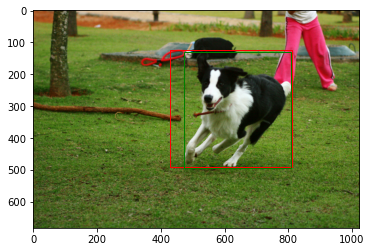

In [13]:
for i in range(0, len(images)):
    plot_tensor(images[i],targets[i]['boxes'], outputs[i]['boxes'])